In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [2]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, Conv1D, MaxPooling1D, Embedding, GlobalMaxPooling1D
from tensorflow.keras.models import Model

In [3]:
df = pd.read_csv('C:\\Users\\Ufuk Altan\\Downloads\\Downloads\\Data Science\\NLPCourse\\spam.tsv', sep='\t')
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [4]:
df = df[['label', 'message']]

In [5]:
df['label'] = df['label'].map({'ham':0, 'spam':1})

In [6]:
X = df['message']
y = df['label']

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

In [8]:
vocab_size = 20000
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(X_train)

In [9]:
train_sequences = tokenizer.texts_to_sequences(X_train)
test_sequences = tokenizer.texts_to_sequences(X_test)

In [10]:
word2idx = tokenizer.word_index
V = len(word2idx)
print(f"Total number of unique tokens are: {V}")

Total number of unique tokens are: 7559


In [11]:
train_data = pad_sequences(train_sequences)
sequence_length = train_data.shape[1]

In [12]:
test_data = pad_sequences(test_sequences,maxlen=sequence_length)

In [13]:
embed_dim = 20

i = Input(shape=(sequence_length,))

m = Embedding(V+1,embed_dim)(i)

m = Conv1D(32, 3, activation='relu')(m)
m = MaxPooling1D(3)(m)

m = Conv1D(64, 3, activation='relu')(m)
m = MaxPooling1D(3)(m)

m = Conv1D(128, 3, activation='relu')(m)
m = GlobalMaxPooling1D()(m)

m = Dense(1, activation='sigmoid')(m)

model = Model(i,m)

In [14]:
model.compile(loss='binary_crossentropy', optimizer ='adam', metrics =['accuracy'])

In [15]:
type(train_data)

numpy.ndarray

In [16]:
y_train = np.array(y_train)
y_test = np.array(y_test)

In [17]:
result = model.fit(train_data, y_train, epochs=5, validation_data=(test_data,y_test))

Train on 3900 samples, validate on 1672 samples
Epoch 1/5
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
3900/3900 [==============================] - 5s 1ms/sample - loss: 0.3892 - accuracy: 0.8554 - val_loss: 0.2546 - val_accuracy: 0.8678
Epoch 2/5
3900/3900 [==============================] - 3s 828us/sample - loss: 0.1391 - accuracy: 0.9446 - val_loss: 0.0942 - val_accuracy: 0.9689
Epoch 3/5
3900/3900 [==============================] - 3s 862us/sample - loss: 0.0237 - accuracy: 0.9910 - val_loss: 0.0742 - val_accuracy: 0.9827
Epoch 4/5
3900/3900 [==============================] - 3s 678us/sample - loss: 0.0061 - accuracy: 0.9990 - val_loss: 0.1067 - val_accuracy: 0.9850
Epoch 5/5
3900/3900 [==============================] - 3s 671us/sample - loss: 0.0030 - accuracy: 0.9995 - val_loss: 0.0929 - val_accuracy: 0.9874


In [18]:
metrics = pd.DataFrame(result.history)

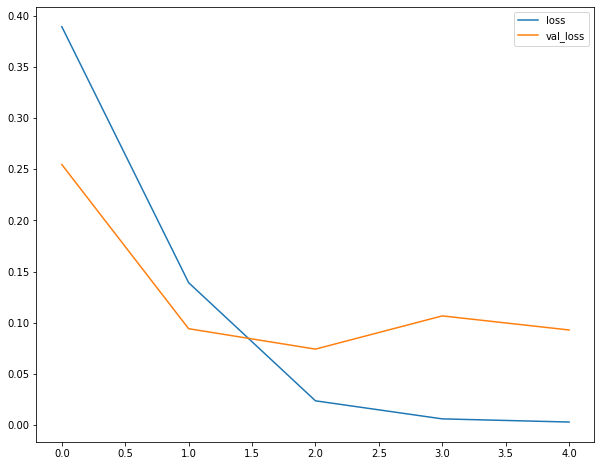

In [19]:
plt.figure(figsize=(10,8))
plt.plot(metrics['loss'], label ='loss')
plt.plot(metrics['val_loss'], label ='val_loss')
plt.legend()
plt.show()

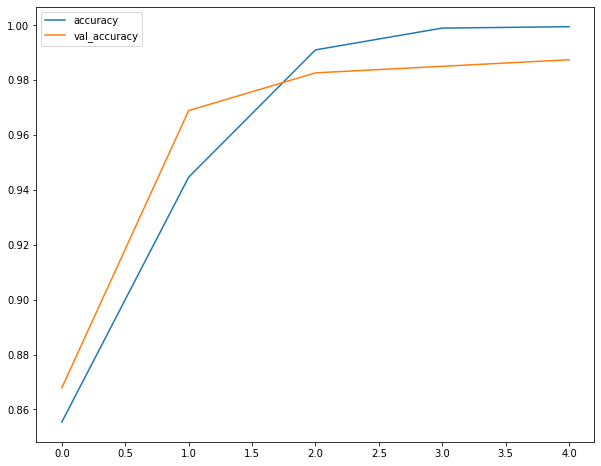

In [20]:
plt.figure(figsize=(10,8))
plt.plot(metrics['accuracy'], label ='accuracy')
plt.plot(metrics['val_accuracy'], label ='val_accuracy')
plt.legend()
plt.show()

In [ ]:
def create_prediction(sentence):
    text = []
    x = 0
    y = 0

    sentence = tokenizer.texts_to_sequences(sentence)
    sentence = pad_sequences(sentence,maxlen=sequence_length)


    while y < (sequence_length-len(sentence)):
        text.append(0)
        y += 1


    while x < len(sentence):
        text.append(sentence[x][161])
        x += 1


    text = np.array(text)
    text = text.reshape(1,162)

    prediction = round(model.predict(text)[0][0])
    
    if prediction == 1.0:
        print('Spam')
    else:
        print('Ham')

In [ ]:
s1 = "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

In [188]:
create_prediction(s1)